In [1]:
import numpy as np
import matplotlib.pyplot as plt

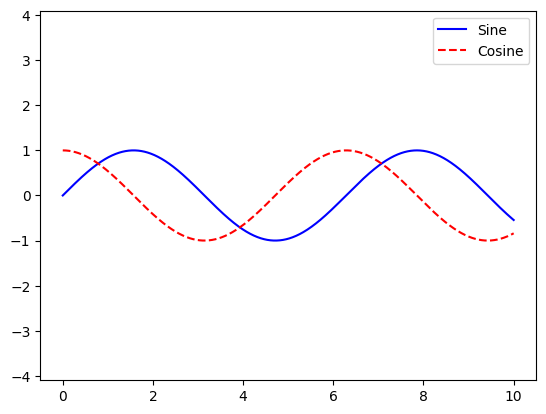

In [4]:
# default
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), "-b", label="Sine")
ax.plot(x, np.cos(x), "--r", label="Cosine")
ax.axis("equal")
leg = ax.legend();

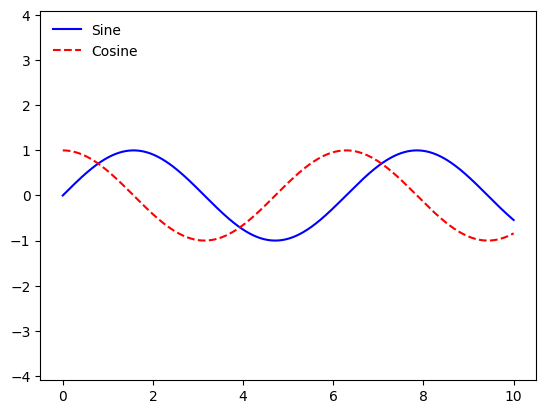

In [5]:
ax.legend(loc="upper left", frameon=False)
fig

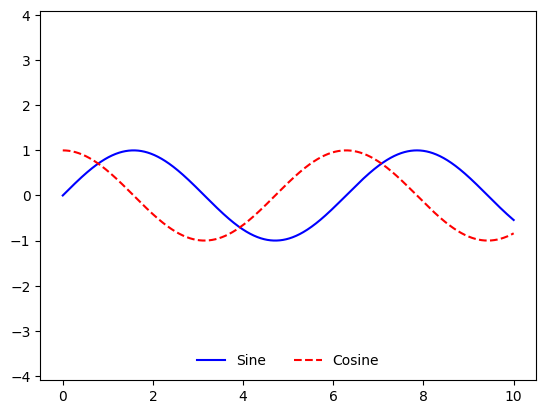

In [7]:
ax.legend(frameon=False, loc="lower center", ncol=2)
fig

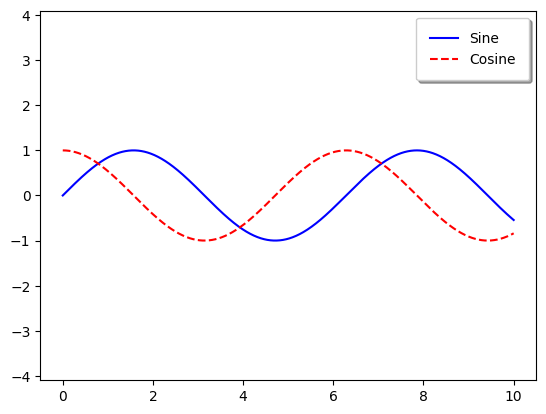

In [8]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### choose element

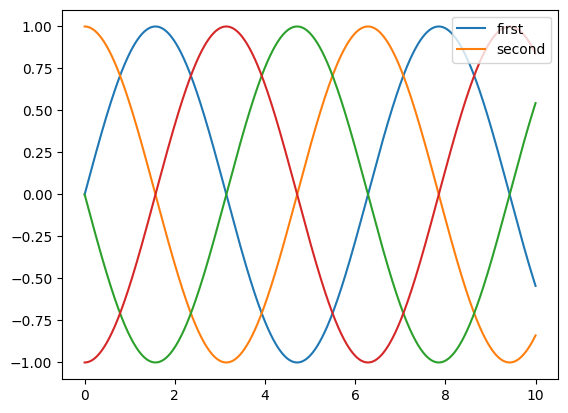

In [13]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ["first", "second"], loc="upper right")

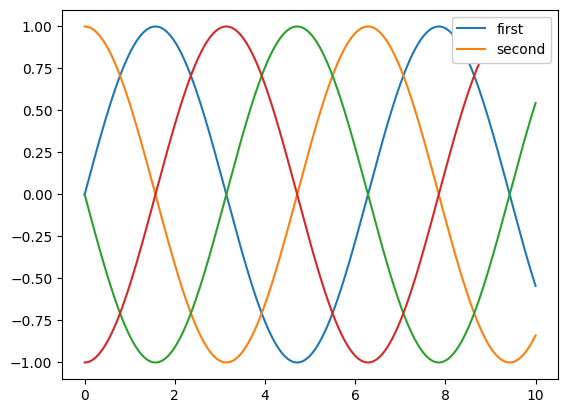

In [16]:
# selectively apply labels
plt.plot(x, y[:, 0], label="first")
plt.plot(x, y[:, 1], label="second")
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True, loc="upper right")

### point size legend

In [29]:
import pandas as pd

# Create a DataFrame with sample data
data = {
    "Latitude": [140.7128, 134.0522, 137.7749, 40.7128, 34.0522, 37.7749],
    "Longitude": [-4.0060, -18.2437, -22.4194, -74.0060, -118.2437, -122.4194],
    "Measure1": np.array([5, 15, 25, 35, 45, 55]) * 1e6,
    "Measure2": np.array([10, 20, 30, 40, 50, 60]) * 10,
}

df = pd.DataFrame(data)
df

,Latitude,Longitude,Measure1,Measure2
0,140.7128,-4.0060,5000000.0,100
1,134.0522,-18.2437,15000000.0,200
2,137.7749,-22.4194,25000000.0,300
3,40.7128,-74.0060,35000000.0,400
4,34.0522,-118.2437,45000000.0,500
5,37.7749,-122.4194,55000000.0,600


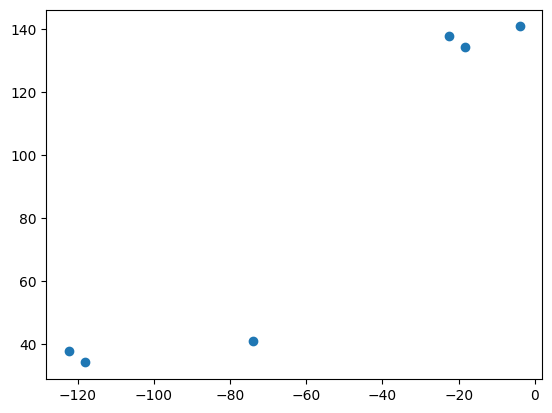

In [30]:
# Extract the data we're interested in
lat, lon = df["Latitude"], df["Longitude"]
plt.scatter(lon, lat)

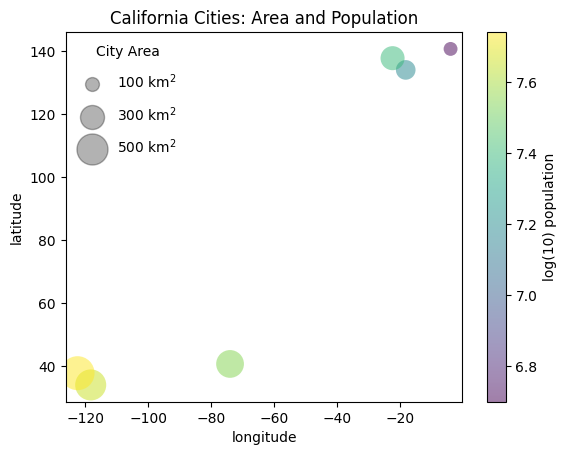

In [31]:
# Extract the data we're interested in
lat, lon = df["Latitude"], df["Longitude"]
population, area = df["Measure1"], df["Measure2"]
# Scatter the points, using size and color but no label
plt.scatter(
    lon,
    lat,
    label=None,
    c=np.log10(population),
    cmap="viridis",
    s=area,
    linewidth=0,
    alpha=0.5,
)
plt.axis("equal")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(label="log(10) population")

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c="k", alpha=0.3, s=area, label=str(area) + " km$^2$")

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title="City Area")
plt.title("California Cities: Area and Population");

### multiple legends

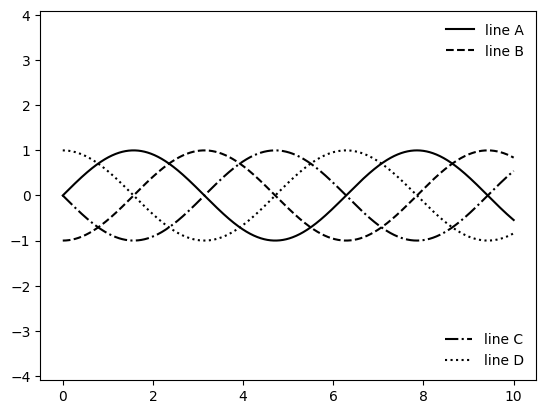

In [34]:
# via add artist

fig, ax = plt.subplots()
lines = []
styles = ["-", "--", "-.", ":"]
x = np.linspace(0, 10, 1000)
for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color="black")
ax.axis("equal")
# specify the lines and labels of the first legend
ax.legend(lines[:2], ["line A", "line B"], loc="upper right", frameon=False)
# Create the second legend and add the artist manually.
from matplotlib.legend import Legend

leg = Legend(ax, lines[2:], ["line C", "line D"], loc="lower right", frameon=False)
ax.add_artist(leg);